In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

## Load The Data

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


## Standardize Features

In [5]:
# Iterate through each column in the DataFrame except the target variable
for column in df.columns:
    if column != 'Diabetes':  
        df[column] = (df[column] - df[column].mean()) / df[column].std()

In [6]:
X = df.drop(columns=['Diabetes'])  # All variables except 'Diabetes'
y = df['Diabetes']  # Target variable 'Diabetes'

## General Cross_Validate Function To Use

In [7]:
def cross_validate(X, y, num_iter=10):
    results = {'precision': [], 'recall': [], 'f1': []}
    for i in range(num_iter):
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Initialize logistic regression model
        log_reg_model = LogisticRegression()
        
        # Fit the logistic regression model on training data
        log_reg_model.fit(X_train, y_train)
        
        # Perform predictions on the testing data
        y_pred = log_reg_model.predict(X_test)
        
        # Compute precision, recall, and F1-score
        p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
        
        # Append scores to results
        results['precision'].append(p)
        results['recall'].append(r)
        results['f1'].append(f)
    
    return results


## Values without any feature selection

In [8]:
# cv_results = cross_validate(X, y)

# # Calculate the mean of each statistic
# mean_precision = sum(cv_results['precision']) / len(cv_results['precision'])
# mean_recall = sum(cv_results['recall']) / len(cv_results['recall'])
# mean_f1 = sum(cv_results['f1']) / len(cv_results['f1'])

# # Print the mean of each statistic
# print("Mean Precision:", mean_precision)
# print("Mean Recall:", mean_recall)
# print("Mean F1-score:", mean_f1)

## Analyze The Features

In [9]:
# Fit logistic regression model
logit_model = sm.Logit(y, X)  # Assuming X and y are defined as in the previous example
logit_result = logit_model.fit()

# Print the coefficients
print("Coefficients:")
print(logit_result.params)

# Print a summary of the fitted model
print("Model summary:")
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.153823
         Iterations 9
Coefficients:
Age               0.761604
Gender           -0.476850
BMI               0.251512
SBP               0.006005
DBP              -0.084991
FPG               0.641340
Chol             -1.480361
Tri               0.526942
HDL               2.775216
LDL               1.464952
ALT               0.083203
BUN               0.036901
CCR              -0.194996
FFPG              1.803750
smoking           0.387927
drinking          2.752359
family_histroy    0.170494
dtype: float64
Model summary:
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                 4303
Model:                          Logit   Df Residuals:                     4286
Method:                           MLE   Df Model:                           16
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.7492


In [10]:
# Get p-values for each feature
p_values = logit_result.pvalues

# Filter features with p-values greater than 0.05
insignificant_features = p_values[p_values > 0.05]

# Print the list of insignificant features
print("Features with p-values > 0.05:")
print(insignificant_features)

Features with p-values > 0.05:
SBP    0.953368
DBP    0.381405
ALT    0.284064
BUN    0.640317
CCR    0.063113
dtype: float64


## Values Of Logistical Regression Without Features with p-values > .05

In [11]:
# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Perform cross-validated predictions
X = df.drop(columns=["SBP", "DBP", "ALT", "BUN", "CCR"])
cv_results = cross_validate(X, y)

# Calculate the mean of each statistic
mean_precision = sum(cv_results['precision']) / len(cv_results['precision'])
mean_recall = sum(cv_results['recall']) / len(cv_results['recall'])
mean_f1 = sum(cv_results['f1']) / len(cv_results['f1'])

# Print the mean of each statistic
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

Mean Precision: 1.0
Mean Recall: 1.0
Mean F1-score: 1.0


## Analyze Data Pieces To See If Perfect Scores Is Just a fluke

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.63888889 0.79525668]'

'recall = [0.47659248 0.883     ]'

'f-score = [0.54593407 0.83683462]'

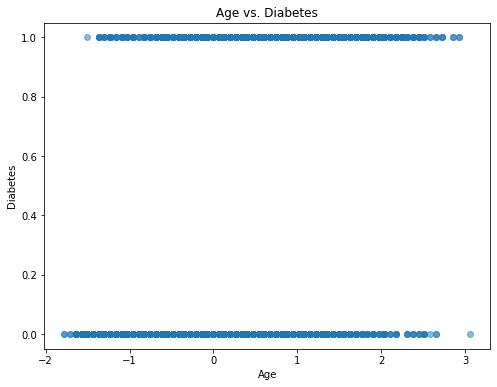

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,0.00]'

C:\Users\dersk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'precision = [0.         0.69718801]'

'recall = [0. 1.]'

'f-score = [0.         0.82158017]'

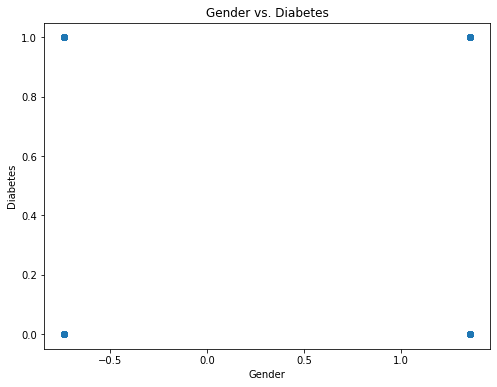

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.50431034 0.70867109]'

'recall = [0.08979279 0.96166667]'

'f-score = [0.152443   0.81600905]'

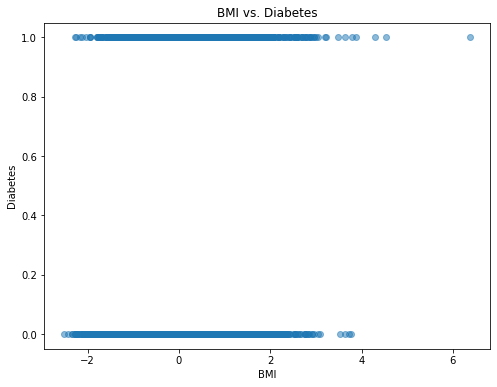

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.62640449 0.72637446]'

'recall = [0.17114351 0.95566667]'

'f-score = [0.26883665 0.82539226]'

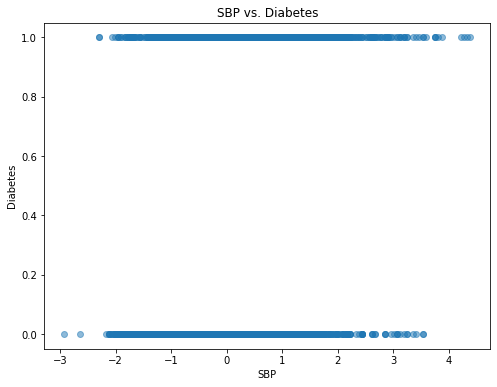

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.61538462 0.70295858]'

'recall = [0.03683807 0.99      ]'

'f-score = [0.06951484 0.82214533]'

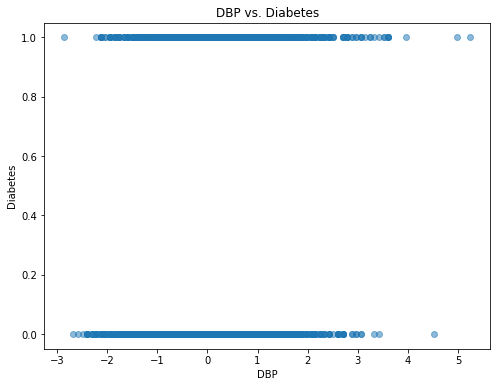

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.76724138 0.82488889]'

'recall = [0.54643131 0.928     ]'

'f-score = [0.6382788  0.87341176]'

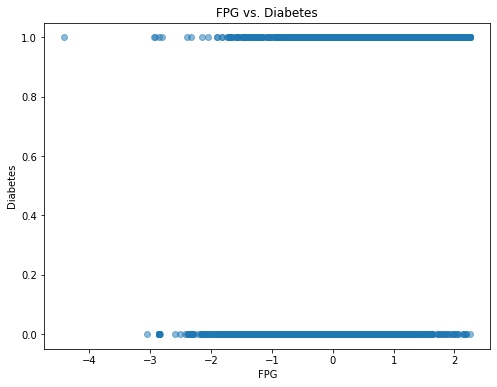

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.52173913 0.69836449]'

'recall = [0.00920952 0.99633333]'

'f-score = [0.01809955 0.82115385]'

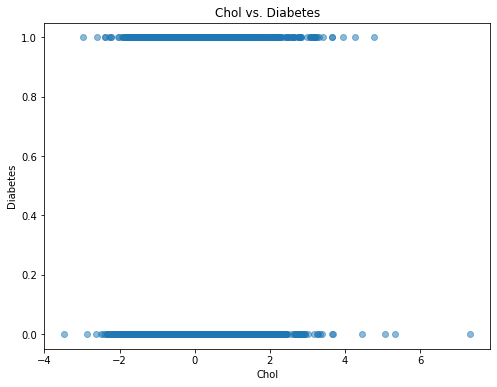

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.57664234 0.70619299]'

'recall = [0.06062932 0.98066667]'

'f-score = [0.10972222 0.82109964]'

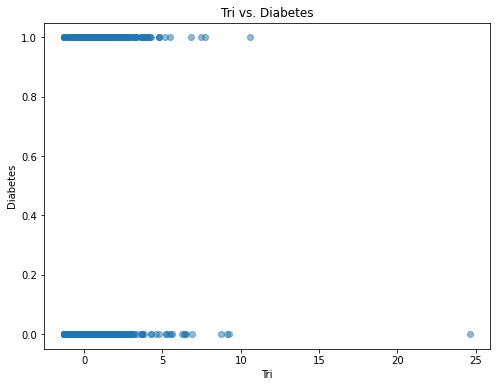

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.97857143 0.77028071]'

'recall = [0.31542594 0.997     ]'

'f-score = [0.47707487 0.86909778]'

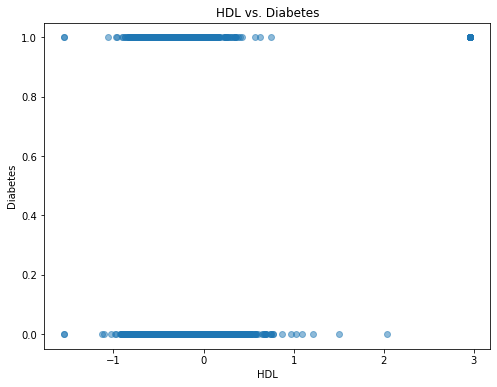

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.75040258 0.77267789]'

'recall = [0.35763622 0.94833333]'

'f-score = [0.48440748 0.85154145]'

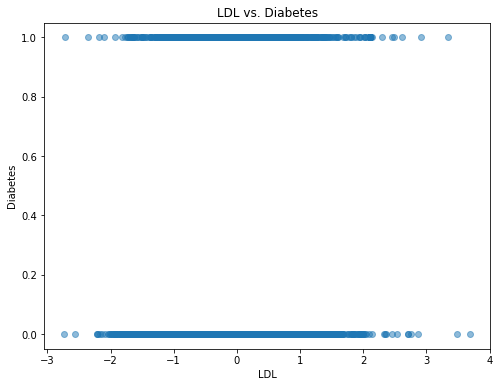

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.22222222 0.6970191 ]'

'recall = [0.00153492 0.99766667]'

'f-score = [0.00304878 0.82067453]'

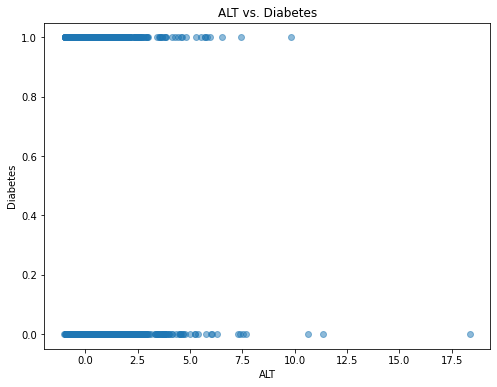

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.5        0.69931877]'

'recall = [0.01765157 0.99233333]'

'f-score = [0.03409933 0.82044922]'

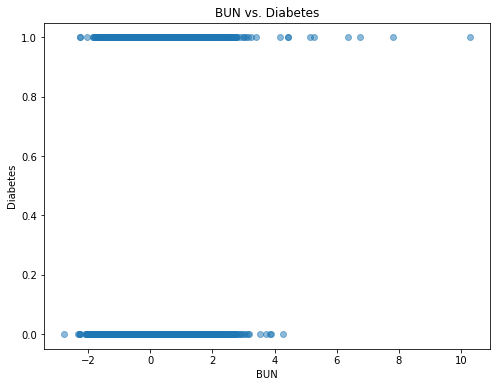

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,0.00]'

C:\Users\dersk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'precision = [0.         0.69718801]'

'recall = [0. 1.]'

'f-score = [0.         0.82158017]'

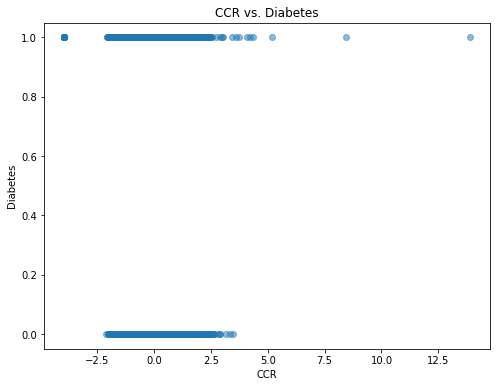

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.87881981 0.86016696]'

'recall = [0.6400614  0.96166667]'

'f-score = [0.74067496 0.90808939]'

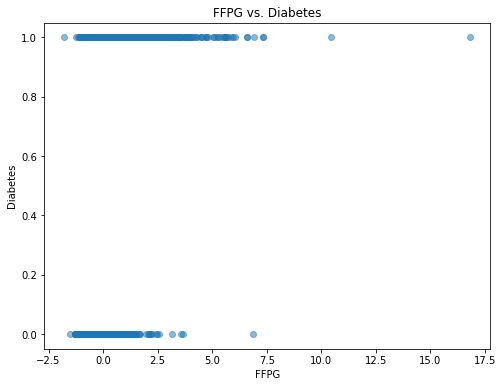

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [1.         0.87847731]'

'recall = [0.68150422 1.        ]'

'f-score = [0.81058877 0.93530787]'

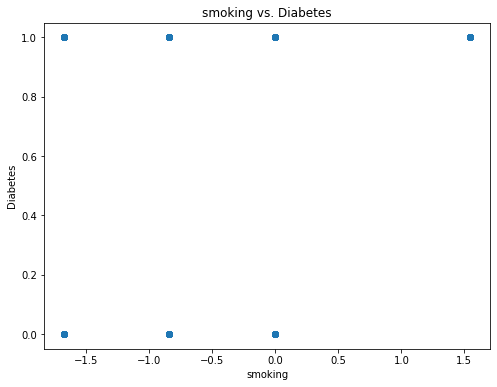

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [1.         0.87847731]'

'recall = [0.68150422 1.        ]'

'f-score = [0.81058877 0.93530787]'

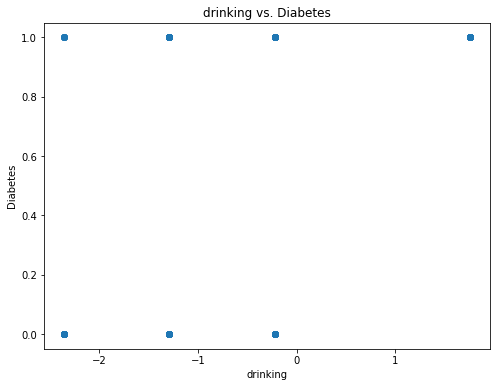

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'predicted range: [0.00,0.00]'

C:\Users\dersk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'precision = [0.         0.69718801]'

'recall = [0. 1.]'

'f-score = [0.         0.82158017]'

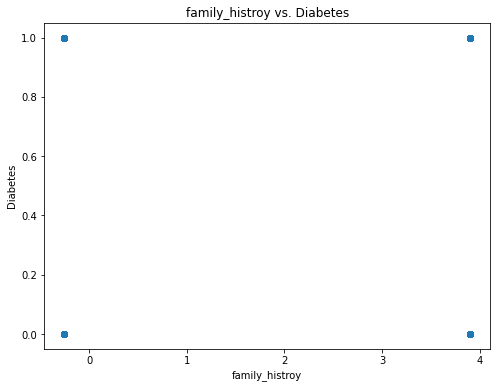

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [1. 1.]'

'recall = [1. 1.]'

'f-score = [1. 1.]'

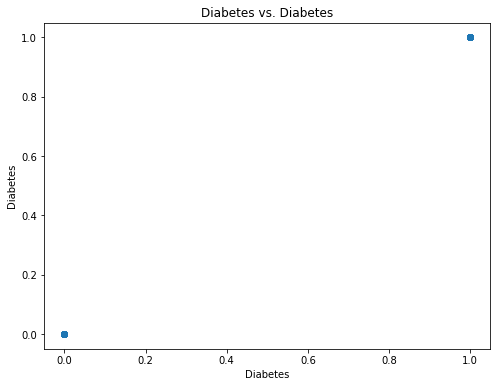

In [12]:
# Iterate through each column in the DataFrame and find statistical variables with them
target_variable = "Diabetes"
for column in df.columns:
    # Create a scatterplot for the current column against the target variable
    X = df[[column]]
    y = df[target_variable]

    # Create a logistic regression model
    lm = LogisticRegression()

    # Fit the model
    lm.fit(X, y)

    # Predictions
    y_pred = lm.predict(X)

    display(y_pred)

    display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

    p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
    display('precision = {}'.format(p))
    display('recall = {}'.format(r))
    display('f-score = {}'.format(f))
    plt.figure(figsize=(8, 6)) 
    plt.scatter(df[column], df[target_variable], alpha=0.5)
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.show()  # Display the scatterplot